In [5]:
import numpy as np
from sklearn.datasets import make_classification
import statsmodels as sm
from statsmodels.discrete.discrete_model import Logit
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
xx = np.linspace(-5, 5, 1000)

설명 : https://datascienceschool.net/view-notebook/ec26c797cec646e295d737c522733b15/

# 1. Logit 사용하기 

In [3]:
X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4) # 가상 데이터 생성
X = sm.tools.tools.add_constant(X0)

In [9]:
# chisqprob 함수가 없다는 오류가 발생하면 다음 두 줄을 실행한다.
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_mod = Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 31 May 2019   Pseudo R-squ.:                  0.7679
Time:                        14:38:08   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


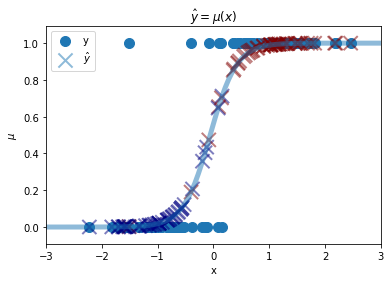

In [26]:
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.tools.tools.add_constant(xx))
plt.plot(xx, mu, lw=5, alpha=0.5)
plt.scatter(X0, y, label="y", marker='o', s=100)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='x', c=y,
            s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

# 2. Logit.from_formula 사용하기 

### 1) 데이터 가져오기

다음 데이터는 미국 의대생의 입학관련 데이터이다. 

In [3]:
data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


### 2) 데이터 확인하기 

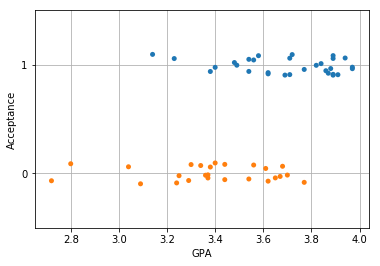

In [6]:
sns.stripplot(x="GPA", y="Acceptance", data=df_med,
              jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

### 3) 모델 만들기 

In [7]:
model_med = Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Sat, 01 Jun 2019   Pseudo R-squ.:                  0.5913
Time:                        20:12:20   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
                                        LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.